### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import seaborn as sns
import re



#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
data_df=pd.read_csv("Data.csv")
user_df=pd.read_csv("user.csv")
item_df=pd.read_csv("item.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [3]:
data_df.describe()
print("-------------------------------")
data_df.info()
print("-------------------------------")
data_df.isnull().sum()
print("-------------------------------")
user_df.describe()
print("-------------------------------")
user_df.info()
print("-------------------------------")
user_df.isnull().sum()
print("-------------------------------")
item_df.describe()
print("-------------------------------")
item_df.info()
print("-------------------------------")
item_df.isnull().sum()
print("-------------------------------")
#data_df.shape()

-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
-------------------------------
-------------------------------
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
-------------------------------
-------------------------------
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 no

#### 4. Find the number of movies per genre using the item data - 5 marks

In [4]:
# use sum on the default axis

item_df.sum(axis=0)

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [6]:
#hint: use sum on the axis = 1
movie=item_df[item_df.sum(axis=1)>2]
#movie
#item_df.sum(axis=1)

#movie=item_df.sum(axis=1)
movie1=movie['movie title']

movie1

0                                Toy Story 
1                                GoldenEye 
2                               Four Rooms 
3                               Get Shorty 
4                                  Copycat 
                       ...                 
1676                            Mat' i syn 
1677                             B. Monkey 
1678                         Sliding Doors 
1679                          You So Crazy 
1680    Scream of Stone (Schrei aus Stein) 
Name: movie title, Length: 1681, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [7]:
item_df.drop(item_df[item_df['unknown'] == 1].index,inplace=True)
item_df

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
#a = 'My*cat*is*brown'
#print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

#print(a[10:])
#print(a[-5:])



brown
brown
brown


In [64]:
#your answers here
# HINT: use distplot for age, release date and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

    
#item_df_temp=item_df.copy()
#item_df_temp['tmp']='1'
#user_df_temp=user_df.copy()
#user_df_temp['tmp']='1'
Dist_item=pd.merge(data_df,user_df,how='inner',on="user id")
Dist_item=pd.merge(Dist_item,item_df,how="inner",on="movie id")
#Dist_item.info()

Dist_item_plot=Dist_item.copy()
Dist_item_plot['release year']=Dist_item_plot['release date'].map(lambda x:x[-4:])
Dist_item_plot
Dist_item_plot=Dist_item_plot
sns.distplot(Dist_item_plot['age'])
sns.distplot(Dist_item_plot['release year'])
sns.countplot(Dist_item_plot['gender'])
sns.countplot(Dist_item_plot['ratings'])
sns.countplot(Dist_item_plot['occupation'])


,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99985,863,1679,3,889289491,17,M,student,60089,B. Monkey,06-Feb-1998,...,0,0,0,0,1,0,1,0,0,1998
99986,863,1678,1,889289570,17,M,student,60089,Mat' i syn,06-Feb-1998,...,0,0,0,0,0,0,0,0,0,1998
99987,863,1680,2,889289570,17,M,student,60089,Sliding Doors,01-Jan-1998,...,0,0,0,0,1,0,0,0,0,1998
99988,896,1681,3,887160722,28,M,writer,91505,You So Crazy,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

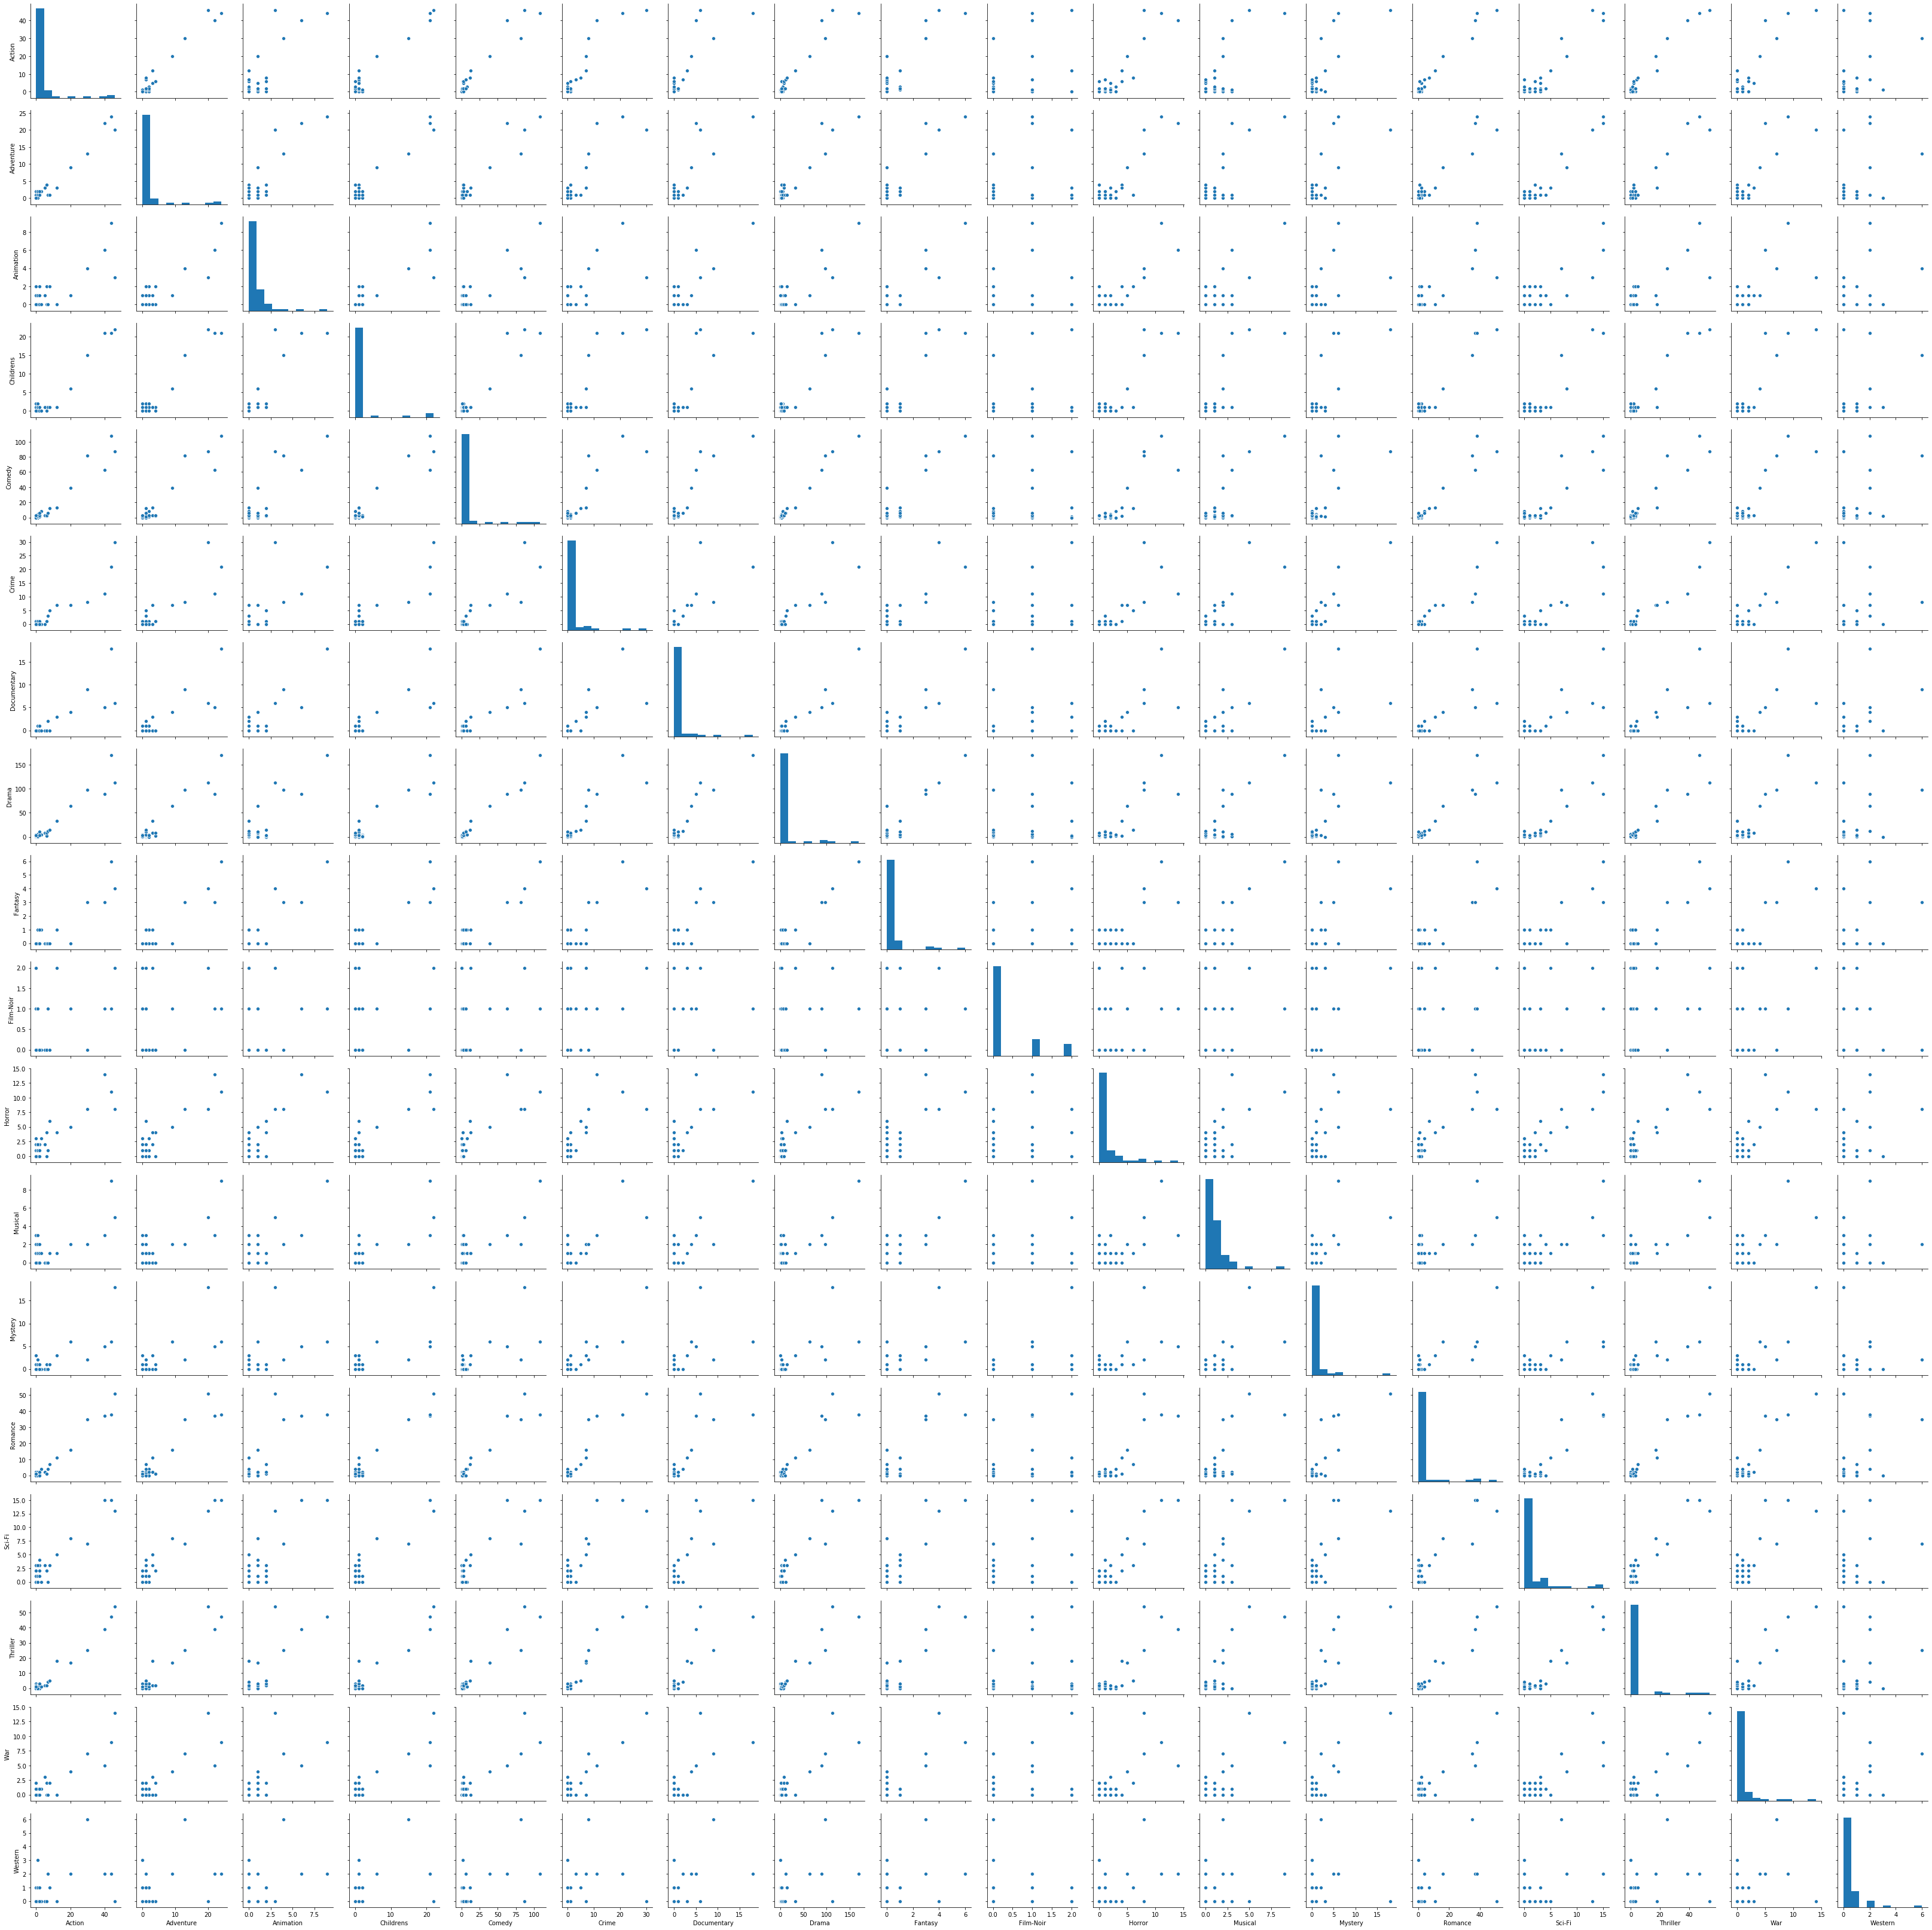

In [134]:
#Your answer here

item_df['release year']=item_df['release date'].apply(lambda x:x[-4:])
item_df.groupby(["release year"])['Action'].count()


item_genre_year_df=item_df.groupby(['release year']).agg({'Action':'sum','Adventure':'sum','Animation':'sum','Childrens':'sum','Comedy':'sum','Crime':'sum','Documentary':'sum','Drama':'sum','Fantasy':'sum','Film-Noir':'sum','Horror':'sum','Musical':'sum','Mystery':'sum','Romance':'sum','Sci-Fi':'sum','Thriller':'sum','War':'sum','Western':'sum'})
sns.pairplot(item_genre_year_df)

#genre_year_df=pd.DataFrame(item_dict,columns=['release year','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'])
#genre_year_df.set_index('release year')
#genre_year_df
#item_dict.describe()

In [3]:
#df_movies_rating=df_rating.groupby(["movie id","movie title"])["rating"].count()

#df_movies_rating_100=df_movies_rating[df_movies_rating["rating"]>100]

#df_movies_rating=df_movies_rating[df_movies_rating["rating"] >100]

#your answer here

df_rating=pd.merge(data_df,item_df,how='inner',on='movie id',sort='true')
#df_movies_rating=df_rating.groupby(["movie title"])["rating"].count()
#df_movies_rating_avg=df_rating.groupby(["movie title"])["rating"].mean()

#df_movies_rating_avg

#aggregations = {            ''}

df_rating_movies=df_rating.groupby(['movie title']).agg({'rating':'count'})
df_rating_movies_mean=df_rating.groupby(['movie title']).agg({'rating':'mean'})
#df_rating_movies_100=pd.Dataframe(data=df_rating_movies)
df_rating_movies_100=df_rating_movies[df_rating_movies['rating'] >100]
#df_rating_movies_100_list=df_rating_movies_100['movie title'].tolist()
#df_rating_movies_100
df_rating_movies_100.rename(columns={'movie title':'movie title','rating':'rating_count'})
df_rating_movies_100_temp=pd.merge(df_rating_movies_mean,df_rating_movies_100,how='inner',on="movie title")
df_rating_movies_100_temp.drop('rating_y',axis=1)
df_rating_movies_100_temp.sort_values('rating_x',ascending=False).head(25)

#df_temp_movies
#df_rating_movies_mean.sort_values('rating',ascending=False)


,rating_x,rating_y
movie title,,
"Close Shave, A",4.491071,112
Schindler's List,4.466443,298
"Wrong Trousers, The",4.466102,118
Casablanca,4.456790,243
"Shawshank Redemption, The",4.445230,283
Rear Window,4.387560,209
"Usual Suspects, The",4.385768,267
Star Wars,4.358491,583
12 Angry Men,4.344000,125


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women



In [21]:
df_rating_user_movie=pd.merge(df_rating,user_df,on='user id',how='inner')
df_user_female=df_rating_user_movie[df_rating_user_movie['gender']=='F']
df_user_female_count=df_user_female['user id'].count()
#df_user_male_count

#display(df_user_female_count)
df_user_male=df_rating_user_movie[df_rating_user_movie['gender']=='M']
df_user_male_count=df_user_male['user id'].count()
display(df_user_male_count)



df_rating_user_drama=df_rating_user_movie[df_rating_user_movie["Drama"]==1]
df_rating_user_drama_count=df_rating_user_drama.groupby(["gender"]).agg({'Drama':'count'})

df_rating_user_SciFi=df_rating_user_movie[df_rating_user_movie["Sci-Fi"]==1]
df_rating_user_SciFi_count=df_rating_user_SciFi.groupby(["gender"]).agg({'Sci-Fi':'count'})

df_rating_user_Romance=df_rating_user_movie[df_rating_user_movie["Romance"]==1]
df_rating_user_Romance_count=df_rating_user_Romance.groupby(["gender"]).agg({'Romance':'count'})







df_rating_user_drama_count['percentage']=df_rating_user_drama_count.apply(lambda row: (row/df_user_female_count)*100 if row.name in ('F') else (row/df_user_male_count)*100)

df_rating_user_drama_temp_male=df_rating_user_drama_count[df_rating_user_drama_count.index=='M']
df_rating_user_drama_count['percentage']=df_rating_user_drama_count.apply(lambda row: (row/df_user_male_count)*100 if row.name in ('M') else (row/df_user_female_count)*100)
df_rating_user_drama_temp_female=df_rating_user_drama_count[df_rating_user_drama_count.index=='F']


df_rating_user_SciFi_count['percentage']=df_rating_user_SciFi_count.apply(lambda row: (row/df_user_female_count)*100 if row.name in ('F') else (row/df_user_male_count)*100)

df_rating_user_SciFi_temp_male=df_rating_user_SciFi_count[df_rating_user_SciFi_count.index=='M']
df_rating_user_SciFi_count['percentage']=df_rating_user_SciFi_count.apply(lambda row: (row/df_user_male_count)*100 if row.name in ('M') else (row/df_user_female_count)*100)
df_rating_user_SciFi_temp_female=df_rating_user_SciFi_count[df_rating_user_SciFi_count.index=='F']


df_rating_user_Romance_count['percentage']=df_rating_user_Romance_count.apply(lambda row: (row/df_user_female_count)*100 if row.name in ('F') else (row/df_user_male_count)*100)

df_rating_user_Romance_temp_male=df_rating_user_Romance_count[df_rating_user_Romance_count.index=='M']
df_rating_user_Romance_count['percentage']=df_rating_user_Romance_count.apply(lambda row: (row/df_user_male_count)*100 if row.name in ('M') else (row/df_user_female_count)*100)
df_rating_user_Romance_temp_female=df_rating_user_Romance_count[df_rating_user_Romance_count.index=='F']




display(df_rating_user_drama_temp_male)
display(df_rating_user_drama_temp_female)

display("Women watch more drama than men")

display(df_rating_user_SciFi_temp_male)
display(df_rating_user_SciFi_temp_female)

display("men watch more Sci-Fi than women")


display(df_rating_user_Romance_temp_male)
display(df_rating_user_Romance_temp_female)


display("Women watch more Romance than men")

#']
#df_rating_user_drama_temp.reset_index()
#df_rating_user_drama_temp1.reset_index()
#df_rating_user_percentage=pd.merge(df_rating_user_drama_temp,df_rating_user_drama_temp1,on=df_rating_user_drama_temp.index,how='inner')
#df_tmp=pd.concat([df_rating_user_drama_temp_male,df_rating_user_drama_temp_female],axis=1)
#df_tmp
#df_rating_user_drama_count['percentage']=df_rating_user_drama_count.apply(lambda row: (row/df_user_female_count) if row.name in ('F') else (row/df_user_male_count)*100)
#df_rating_user_drama_temp


74253

,Drama,percentage
gender,,
M,28887,38.903479


,Drama,percentage
gender,,
F,11008,42.769446


,Sci-Fi,percentage
gender,,
M,10101,13.603491


,Sci-Fi,percentage
gender,,
F,2629,10.214469


,Romance,percentage
gender,,
M,13603,18.319799


,Romance,percentage
gender,,
F,5858,22.760121


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:

